In [460]:
import json 
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

In [461]:
!pip install colorama

In [462]:
with open('intents.json') as file:
    data = json.load(file)
    
train_patterns = [] # patterns
train_intents = [] # tags
labels = [] #tags
responses = []


for intent in data['intents']:
    for pattern in intent['patterns']:
        train_patterns.append(pattern)
        train_intents.append(intent['tag'])
    responses.append(intent['responses'])
    
    if intent['tag'] not in labels:
        labels.append(intent['tag'])
        
num_classes = len(labels)

In [463]:
print("train_patterns :", train_patterns[100])
print("train_intents :", train_intents[100])
print("num_classes :", num_classes)

train_patterns : I am hungry
train_intents : menu
num_classes : 23


### Then we use `LabelEncoder()` function provided by scikit-learn to convert the target labels into a model understandable form.

In [464]:
label_encoder = LabelEncoder()
label_encoder.fit(train_intents)
train_intents = label_encoder.transform(train_intents)

## Vectorization

- We vectorize our text data corpus by using the “Tokenizer” class and it allows us to limit our vocabulary size up to some defined number. 

- When we use this class for the text pre-processing task, by default all punctuations will be removed, turning the texts into space-separated sequences of words, and these sequences are then split into lists of tokens. 

- They will then be indexed or vectorized. We can also add “oov_token” which is a value for “out of token” to deal with out of vocabulary words(tokens) at inference time.

- The “pad_sequences” method is used to make all the training text sequences into the same size.

In [465]:
vocab_size = 11250
embedding_dim = 16
max_len = 20
oov_token = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=None)
tokenizer.fit_on_texts(train_patterns)

word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(train_patterns)

padded_sequences = pad_sequences(sequences, truncating='post', maxlen=max_len)

In [466]:
print("train_patterns :", train_patterns[99])
print("sequences: ", sequences[99])

train_patterns : Im damn hungry
sequences:  [204, 205, 127]


## 1) Here, we have to deal with multiple inputs or multiple outputs. Hence, we'll use `Keras` `Sequential()` model.

read more : [Kears Sequential model details](https://keras.io/guides/sequential_model/)

## 2) Loss Function: `sparse_categorical_crossentropy` : We are using this crossentropy loss function when there are two or more label classes.
read more about [sparse_categorical_crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy)

In [467]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 20, 16)            180000    
                                                                 
 global_average_pooling1d_9   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_27 (Dense)            (None, 16)                272       
                                                                 
 dense_28 (Dense)            (None, 16)                272       
                                                                 
 dense_29 (Dense)            (None, 23)                391       
                                                                 
Total params: 180,935
Trainable params: 180,935
Non-trainable params: 0
________________________________________________

In [468]:
epochs = 500
history = model.fit(padded_sequences, np.array(train_intents), epochs=epochs)

Epoch 1/500
12/12 [==============================] - 1s 16ms/step - loss: 3.1309 - accuracy: 0.0761
Epoch 2/500
12/12 [==============================] - 0s 5ms/step - loss: 3.1212 - accuracy: 0.1440
Epoch 3/500
12/12 [==============================] - 0s 5ms/step - loss: 3.1105 - accuracy: 0.1440
Epoch 4/500
12/12 [==============================] - 0s 6ms/step - loss: 3.0984 - accuracy: 0.1440
Epoch 5/500
12/12 [==============================] - 0s 6ms/step - loss: 3.0832 - accuracy: 0.1440
Epoch 6/500
12/12 [==============================] - 0s 5ms/step - loss: 3.0651 - accuracy: 0.1440
Epoch 7/500
12/12 [==============================] - 0s 5ms/step - loss: 3.0452 - accuracy: 0.1440
Epoch 8/500
12/12 [==============================] - 0s 5ms/step - loss: 3.0208 - accuracy: 0.1440
Epoch 9/500
12/12 [==============================] - 0s 5ms/step - loss: 2.9953 - accuracy: 0.1440
Epoch 10/500
12/12 [==============================] - 0s 6ms/step - loss: 2.9694 - accuracy: 0.1440
Epoch 11

12/12 [==============================] - 0s 4ms/step - loss: 0.2542 - accuracy: 0.9429
Epoch 164/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2483 - accuracy: 0.9402
Epoch 165/500
12/12 [==============================] - 0s 5ms/step - loss: 0.2425 - accuracy: 0.9511
Epoch 166/500
12/12 [==============================] - 0s 5ms/step - loss: 0.2384 - accuracy: 0.9457
Epoch 167/500
12/12 [==============================] - 0s 5ms/step - loss: 0.2346 - accuracy: 0.9511
Epoch 168/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2297 - accuracy: 0.9565
Epoch 169/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2267 - accuracy: 0.9592
Epoch 170/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2222 - accuracy: 0.9592
Epoch 171/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2197 - accuracy: 0.9701
Epoch 172/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2161 - accuracy: 0.9484
Epoc

12/12 [==============================] - 0s 5ms/step - loss: 0.0148 - accuracy: 1.0000
Epoch 326/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0145 - accuracy: 1.0000
Epoch 327/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0144 - accuracy: 1.0000
Epoch 328/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0142 - accuracy: 1.0000
Epoch 329/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0139 - accuracy: 1.0000
Epoch 330/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0137 - accuracy: 1.0000
Epoch 331/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0138 - accuracy: 1.0000
Epoch 332/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0133 - accuracy: 1.0000
Epoch 333/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0132 - accuracy: 1.0000
Epoch 334/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0130 - accuracy: 1.0000
Epoc

12/12 [==============================] - 0s 4ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 488/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 489/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 490/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 491/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 492/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 493/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 494/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 495/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 496/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0019 - accuracy: 1.0000
Epoc

In [469]:
history_dict = history.history

Text(0.5, 0, 'Epochs')

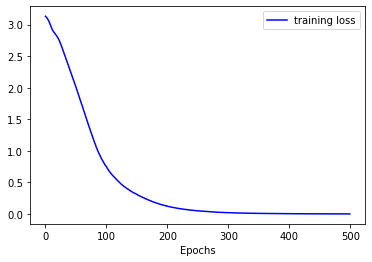

In [470]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


loss_values = history_dict['loss']
#val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'b',label='training loss')
#plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

Text(0.5, 0, 'Epochs')

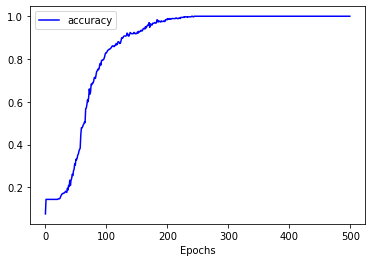

In [471]:
accuracy_values = history_dict['accuracy']
#val_accuracy_values=history_dict['val_accuracy']
#plt.plot(val_accuracy_values,'-r',label='val_accuracy')
plt.plot(accuracy_values,'-b',label='accuracy')
plt.legend()
plt.xlabel("Epochs")

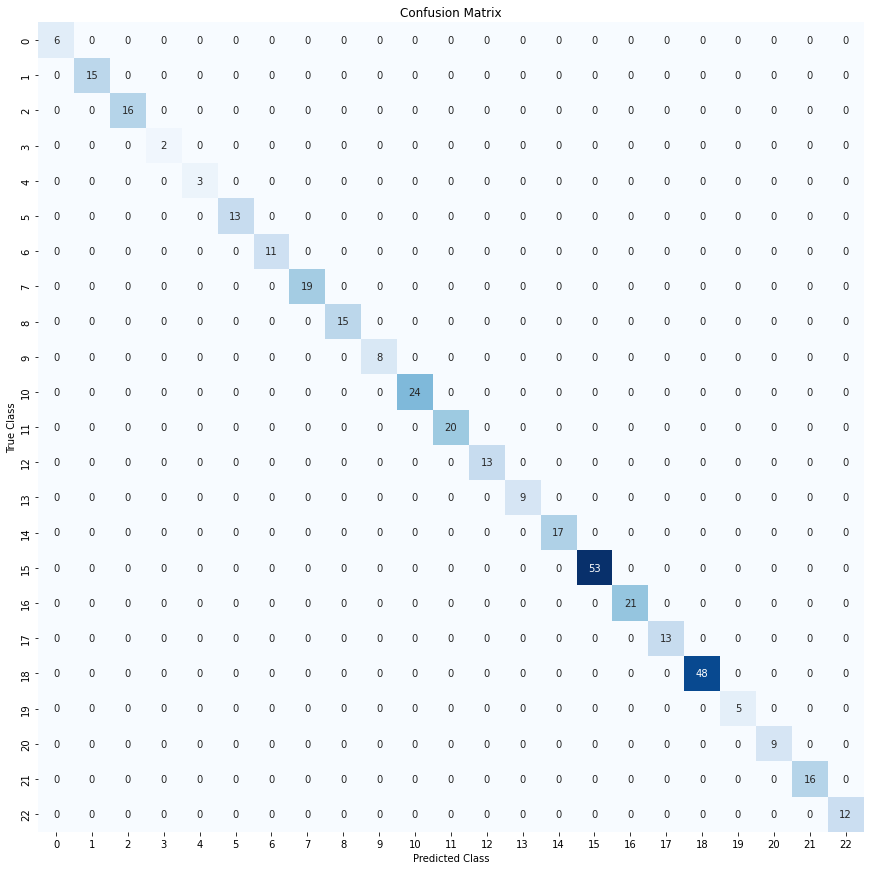

In [472]:
y_pred = model.predict(padded_sequences)
y_result=[]
for i in y_pred:
    max_value = max(i)
    #print(max_value)
    y_result.append(np.where(i == max_value)[0][0])





from sklearn.metrics import confusion_matrix
#CM matrix for training data
plt.figure(figsize=(12,12))

matrix_nn = confusion_matrix(y_result, np.array(train_intents))

sns.heatmap(matrix_nn, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

## Save the models

We are saving 3 different things separately
- Classification model
- fitted Tokenizer object
- fitted label encoder object

In [473]:
# saving model
model.save("chat_model")

import pickle

# saving tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    

# saving label encoder
with open('label_encoder.pickle', 'wb') as ecn_file:
    pickle.dump(label_encoder, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)

INFO:tensorflow:Assets written to: chat_model\assets


In [474]:
!pip install pymongo

In [475]:
import json
import random
import datetime
import pymongo
import uuid

In [476]:
seat_count = 50
import urllib.parse
# Make sure Settings->Network Access has correct settings



password=urllib.parse.quote_plus("<password>")
database = urllib.parse.quote_plus("<database>")

URI= "mongodb+srv://<hostname>:" + password + "@cluster0.jpcjh.mongodb.net/" + database + "?" + "retryWrites=true&w=majority"
#client = pymongo.MongoClient(URI)
client = pymongo.MongoClient(URI, connect=False)

db = client["<database>"]
menu_collection = db["menu"]
feedback_collection = db["feedback"]
order_collection=db["Orders"]
bookings_collection = db["bookings"]

In [477]:
query = {"mainmenu": "Y"}

veg_data = menu_collection.find(query)
x=[]
for i in veg_data:
    if (i.get("breakfast")=="N") == True:
        x.append(i.get("item"))
x

['Soups',
 'Starters',
 'Main Course',
 'Snacks',
 'Snacks',
 'Breakfast',
 'accompaniments']

In [1]:
# Order
def record_order(message):
    print("Saving customers order")
    print(message)
    items_ = message.split("||")


    arr_dict={}
    for j,i in enumerate(items_[1:-1]):
 
        str1_ = i.split(",")
        dict_name='item {}'.format(j)
        arr_dict[dict_name]={}
    
        arr_dict[dict_name]['item'] = str1_[0].split(":")[1]
        arr_dict[dict_name]['price'] = str1_[1].split(":")[1]
        arr_dict[dict_name]['quantity'] = str1_[2].split(":")[1]
        #print(arr_dict[dict_name])
    

    
    arr_dict["Total Price"]={}
    arr_dict["order_details"]={}
         
    orderplaced_id = str(uuid.uuid4())
    arr_dict["Total Price"]["total bill"] = items_[0].split(":")[1]
    arr_dict["order_details"]["OrderID"] = orderplaced_id
    
    # Adding the ordering time:
    now_ = datetime.datetime.now()
    booking_time_ = now_.strftime("%Y-%m-%d %H:%M:%S")
    arr_dict["order_details"]["OrderTime"] = booking_time_
    arr_dict["order_details"]["placed"]="yes"
    arr_dict["order_details"]["canceled"]="no"
    
    
    
    # Make the array of nested dictionary
    item_dict=[]
    item_dict.append(arr_dict)
    
    nested_dictionary =item_dict
    order_collection.insert_many(nested_dictionary)
    return orderplaced_id
    # get the order id
    
    
    
# Cancel Order
def cancel_order(order_id):
    print(order_id)
    result={}
    status_=""
    query = {"order_details.OrderID": order_id}
    doc_ = order_collection.find(query)
    
    for x in doc_:
        result = x
        
    print(result)
    status_=arr_dict["order_details"]["OrderStatus"]
    print(status_)
   
        
    if result:
        if status_ == 'placed':
            newvalues = {"OrderStatus": "canceled" } 


            order_itemX=['Total Price','_id','order_details', 'OrderStatus']
            cancelStr = "Cancelling your order with : "
            for i in result:
                if i not in order_itemX:
                    cancelStr+= "("+result[i]['quantity'] + "-" + result[i]['item'] + ") "
            
   
            cancelStr+="💰 ₹" + result['Total Price']['total bill'] + " will be refunded to your account."
    
            result["order_details"].update(newvalues)
            print(result)
            return cancelStr
        
        else:
            return "🚫 This order has been canceled already."
    
    else:
        return "Please enter correct Order ID and 📌before entering order ID send the 'cancel Order' message again." 


# Book a table:
seat_count = 50
def book_table():
    global seat_count
    seat_count = seat_count - 1
    booking_id = str(uuid.uuid4())
    now = datetime.datetime.now()
    booking_time = now.strftime("%Y-%m-%d %H:%M:%S")
    booking_doc = {"booking_id": booking_id, "booking_time": booking_time}
    bookings_collection.insert_one(booking_doc)
    return booking_id


def get_specific_response(tag):
    for intent in data['intents']:
        if intent['tag'] == tag:
            responses = intent['responses']
    response = random.choice(responses)
    return response


"""def show_menu():
    all_items = menu_collection.distinct('item')
    response = ', '.join(all_items)
    return response"""

def record_feedback(message, type):
    print("Recording your feedback")
    feedback_doc = {"feedback_string": message, "type": type}
    feedback_collection.insert_one(feedback_doc)
    
def recipe_enquiry(inp):
    response=""
    for i in menu_collection.distinct('item'):
        if i.lower() in inp.lower():
            #print(i)
            #if inp.lower()== i.lower():
        
            query_about= {"item":i}
            about = menu_collection.find(query_about)
            for j in about:
                response = j.get("details")
        
            
    if response =="":
        response = "I don't know much about this recipe! But, you can contact our restaurant for more details."
    return response


def suggest():
    day = datetime.datetime.now()
    day = day.strftime("%A")
    if day == "Monday":
        response = "I would recommend: Paneer Roll and Chicken Biryani"
    elif day == "Tuesday":
        response = "I would recommend: Cheese Grilled Sandwich and Chicken tripple rice"

    elif day == "Wednesday":
        response = "I would recommend: Egg Roll and Latte "

    elif day == "Thursday":
        response = "I would recommend: Mixed Fruit Juice and Chicken cheese sandwich"

    elif day == "Friday":
        response = "I would recommend: White Sauce Pasta and Cheese cake"

    elif day == "Saturday":
        response = "I would recommend: Chicken Roll and cold coffee"

    elif day == "Sunday":
        response = "I would recommend: Schezwan Rice and Manchurian"
    return response

"""
def veg_menu():
    res=[]    
    query = {"veg": "Y"}
    b_query = {"Breads": "Y"}
    d_query = {"Desert": "Y"}
    i_query = {"icecreams_bev":"Y"}
    breads=[]
    deserts =[]
    ice_bev=[]


    b_doc = menu_collection.find(b_query)
    for x in b_doc:
        breads.append(x.get("item"))
    
    d_doc = menu_collection.find(d_query)
    for x in d_doc:
        deserts.append(x.get("item"))
    
    i_doc = menu_collection.find(i_query)
    for x in i_doc:
        ice_bev.append(x.get("item")) 
        
        
    veg_doc = menu_collection.find(query)
    for x in veg_doc:
        if x.get("item") not in exclude_items:
            res.append(str(x.get("item")) + " for Rs. " + str(x.get("cost")) + "\n")
        
        
    return res"""

"""def nonveg_menu():
    query = {"nonveg": "Y"}
    vegan_doc = menu_collection.find(query)
    if vegan_doc.count() > 0:
        response = "Non-Vegetarian options are: "
        for x in vegan_doc:
            response = response + str(x.get("item")) + " for Rs. " + str(x.get("cost")) + "; "
        response = response[:-2] # to remove the last ;
    else:
        response = "Sorry no vegetarian options are available"
    return response
"""

"""def nonveg_menu():
    re=[]
    query = {"nonveg": "Y"}
    doc = menu_collection.find(query)
    for x in doc:
        re.append(str(x.get("item")) + " for Rs. " + str(x.get("cost")) + "\n")
        #response = response[:-2] # to remove the last ;
        #print(response,"\n")
    return re




def breakfast_menu():
    br=[]
    query = {"breakfast": "Y"}
    doc = menu_collection.find(query)
    for x in doc:
        br.append(str(x.get("item")) + " for Rs. " + str(x.get("cost")) + "\n")
        
    return br

def bevrages_menu():
    bev=[]
    query = {"icecreams_bev": "Y"}
    doc = menu_collection.find(query)
    for x in doc:
        bev.append(str(x.get("item")) + " for Rs. " + str(x.get("cost")) + "\n")
        
    return bev

def dessert_menu():
    de=[]
    query = {"Desert": "Y"}
    doc = menu_collection.find(query)
    for x in doc:
        de.append(str(x.get("item")) + " for Rs. " + str(x.get("cost")) + "\n")
 
    return de

def snacks_menu():
    sn=[]
    query = {"snacks": "Y"}
    doc = menu_collection.find(query)
    for x in doc:
        sn.append(str(x.get("item")) + " for Rs. " + str(x.get("cost")) + "\n")
       
    return sn


def main_menu():
    menu=[]
    query = {"mainmenu": "Y"}
    doc = menu_collection.find(query)
    for x in doc:
        menu.append(str(x.get("item")) +"\n")
   
    return menu"""

def offers():
    
    response = "Sorry there are no offers available now."
    return response

In [2]:
def generate_response(tag, user_input):
    global seat_count
    #tag = get_intent(message)
    response = ""
    if tag != "":
        if tag == "book_table":

            if seat_count > 0:
                booking_id = book_table()
                response = "Your table has been booked successfully :" + str(
                    booking_id)
            else:
                response = "Sorry we are sold out now!"


        elif tag == "available_tables":
            response = "Right now, there are " + str(seat_count) + " table(s) available."

        elif tag == "veg_enquiry":
            response ="Hey, You can discover our amazing vegetarian options in the Menu section on your left."

        elif tag == "nonveg_enquiry":
            response = "Hey, You can discover Non-vegetarian food options in the Menu section on your left."
            
        elif tag == "vegan_enquiry":
            response = "Sorry, We don't serve Vegan Food"

        elif tag == "offers":
            response =offers()

        elif tag == "suggest":
            
            response =suggest()
            response+="\n"+"Or else you can check our populars in the Menu section!!"

        elif tag == "recipe_enquiry":
            response =recipe_enquiry(user_input)

        elif tag == "menu":
            response="Checkout our lip-smacking food options on your left. Just add whichever food item you like." + "\n" + "worried about recipes and ingredients? ask me!!. I've got you covered 😎"
            
        elif tag == "Icecreams_bevrages":
            response = "Checkout Desserts option for the refreshing bevrages!! 🍨"
            
        elif tag == "Quick_Bites":
          
            response = "Hey, You can explore breakfast, Snacks and Desserts options on your left for some quick refreshments!!"
            
        elif tag == "positive_feedback":
            record_feedback(user_input, "positive")
            response = "Huzzah!!😍 Thank you so much for your valuable feedback. We look forward to serving you again!"

        elif "negative_feedback" == tag:
            record_feedback(user_input, "negative")
            response = "Thank you so much for your valuable feedback. We deeply regret the inconvenience. We have " \
                       "forwarded your concerns to the authority and hope to satisfy you better the next time! 🙏"
        # for other intents with pre-defined responses that can be pulled from dataset
        else:
            response = get_specific_response(tag)
    else:
        response = "Sorry! I didn't get it, please try to be more precise."
    return response


### Load the model

In [744]:
def response_gen(message):
    model = keras.models.load_model('chat_model')

    # load tokenizer object
    with open('tokenizer.pickle', 'rb') as handle:
        tokenizer = pickle.load(handle)

    # load label encoder object
    with open('label_encoder.pickle', 'rb') as enc:
        lbl_encoder = pickle.load(enc)

    # parameters
    max_len = 20
    
    result = model.predict(keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([message]),truncating='post', maxlen=max_len))
    
    ## Find the intent
    tag = lbl_encoder.inverse_transform([np.argmax(result)])
    print(tag)

    for i in data['intents']:
        if i['tag'] == tag:
            output = generate_response(tag, message)
            
    return output
  
    

In [745]:
from flask import Flask, render_template, request, jsonify
import json 
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
import os

ORDER_ID=False

TEMPLATE_DIR = os.path.abspath('./templates')
STATIC_DIR = os.path.abspath('./static')

app = Flask(__name__) # to make the app run without any

@app.route('/')
def index():
    return render_template('index.html')


@app.route('/get')
def get_bot_response():
    
    message = request.args.get('msg')
    #print(message)
    response = ""
    if message:
        if message.startswith("TotalPrice:"):
            print(message)
            o_id = record_order(message)
            id_res = "Your Order ID is : " + o_id + " Kindly remember this ID for the future reference."
            return id_res
        #Order Cancel
        elif message.endswith("-ORDERID"):
            # if intent is Cancel
            print(message)
            
            cancelOrderStr = cancel_order(message.split("-ORDERID")[0])
            
            return cancelOrderStr
            
            
            
        else:
            response = response_gen(message)
            #print(response)
            
                
        
        return str(response)
    
    else:
        return "Missing Data!"
    


if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [16/Feb/2022 21:16:38] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [16/Feb/2022 21:16:38] "GET /style.css HTTP/1.1" 404 -
127.0.0.1 - - [16/Feb/2022 21:16:38] "GET /script.js HTTP/1.1" 404 -
127.0.0.1 - - [16/Feb/2022 21:16:38] "GET /script.js HTTP/1.1" 404 -
127.0.0.1 - - [16/Feb/2022 21:16:44] "GET /get?msg=TotalPrice%3A10%7C%7CProductName%3Aproduct+1%2CproductPrice%3A10%2CproductQuantity%3A1%7C%7C HTTP/1.1" 200 -


TotalPrice:10||ProductName:product 1,productPrice:10,productQuantity:1||
Saving customers order
TotalPrice:10||ProductName:product 1,productPrice:10,productQuantity:1||
